In [1]:
!pip install eli5

In [2]:
import sys  
sys.path.insert(1, '../src')
import recsys_support.support_func as rs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import trange

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

In [4]:
rs.say_hello()

Hello from support func.py 2


## Load Data

In [5]:
df_base = pd.read_parquet("../tmp/cleared_df_base_new_features.parquet")

In [6]:
df_base.head(5)

,0,1,2,3,4,5,7,8,9,10,...,69,71,6,21,25,33,44,59,65,70
Id,,,,,,,,,,,,,,,,,,,,,
0-base,-115.083893,11.152912,-64.426758,-118.880890,216.482437,-104.698059,44.348083,120.915344,181.449707,-124.061508,...,115.269188,-60.830353,-0.105615,0.503497,0.247134,-0.146048,-0.937798,1.541230,-0.722587,1.349423
1-base,-34.562202,13.332763,-69.787613,-166.533478,57.680607,-86.098373,-35.637436,119.718636,195.234192,-141.304352,...,116.834000,-59.524609,0.917676,-1.390413,0.247134,0.860725,0.395763,0.212176,-0.918577,1.424935
2-base,-54.233746,6.379371,-29.210136,-133.413834,150.895828,-99.435326,62.381706,128.951447,164.381470,-140.822449,...,116.594154,-32.527206,1.620933,0.503497,0.247134,-0.718462,-0.315012,-0.820666,0.941837,-0.520661
3-base,-87.520126,4.037884,-87.803032,-185.067627,76.369537,-58.985165,-33.611237,122.031914,136.233582,-108.470444,...,117.474098,-72.915489,0.086817,-0.286135,0.247134,-0.023839,1.705571,-0.865241,-0.405384,-0.520661
4-base,-72.743851,6.522048,43.671265,-140.608032,5.820023,-112.074081,45.182499,122.167183,112.119064,-110.342453,...,135.051590,0.319401,0.051583,-0.473158,-1.377040,-0.320173,0.333797,-0.822464,0.541299,-0.520661


In [7]:
def checkRobustScaler(base):
    scaler = RobustScaler()
    scaler.fit(base)

    tbase = scaler.transform(base)
    tbase = pd.DataFrame(tbase, columns=base.columns)
    tbase["Id"] = base.index
    tbase = tbase.set_index(["Id"])

    return tbase, scaler

## EDA

In [8]:
df_analyze, _ = checkRobustScaler(df_base.sample(100000))

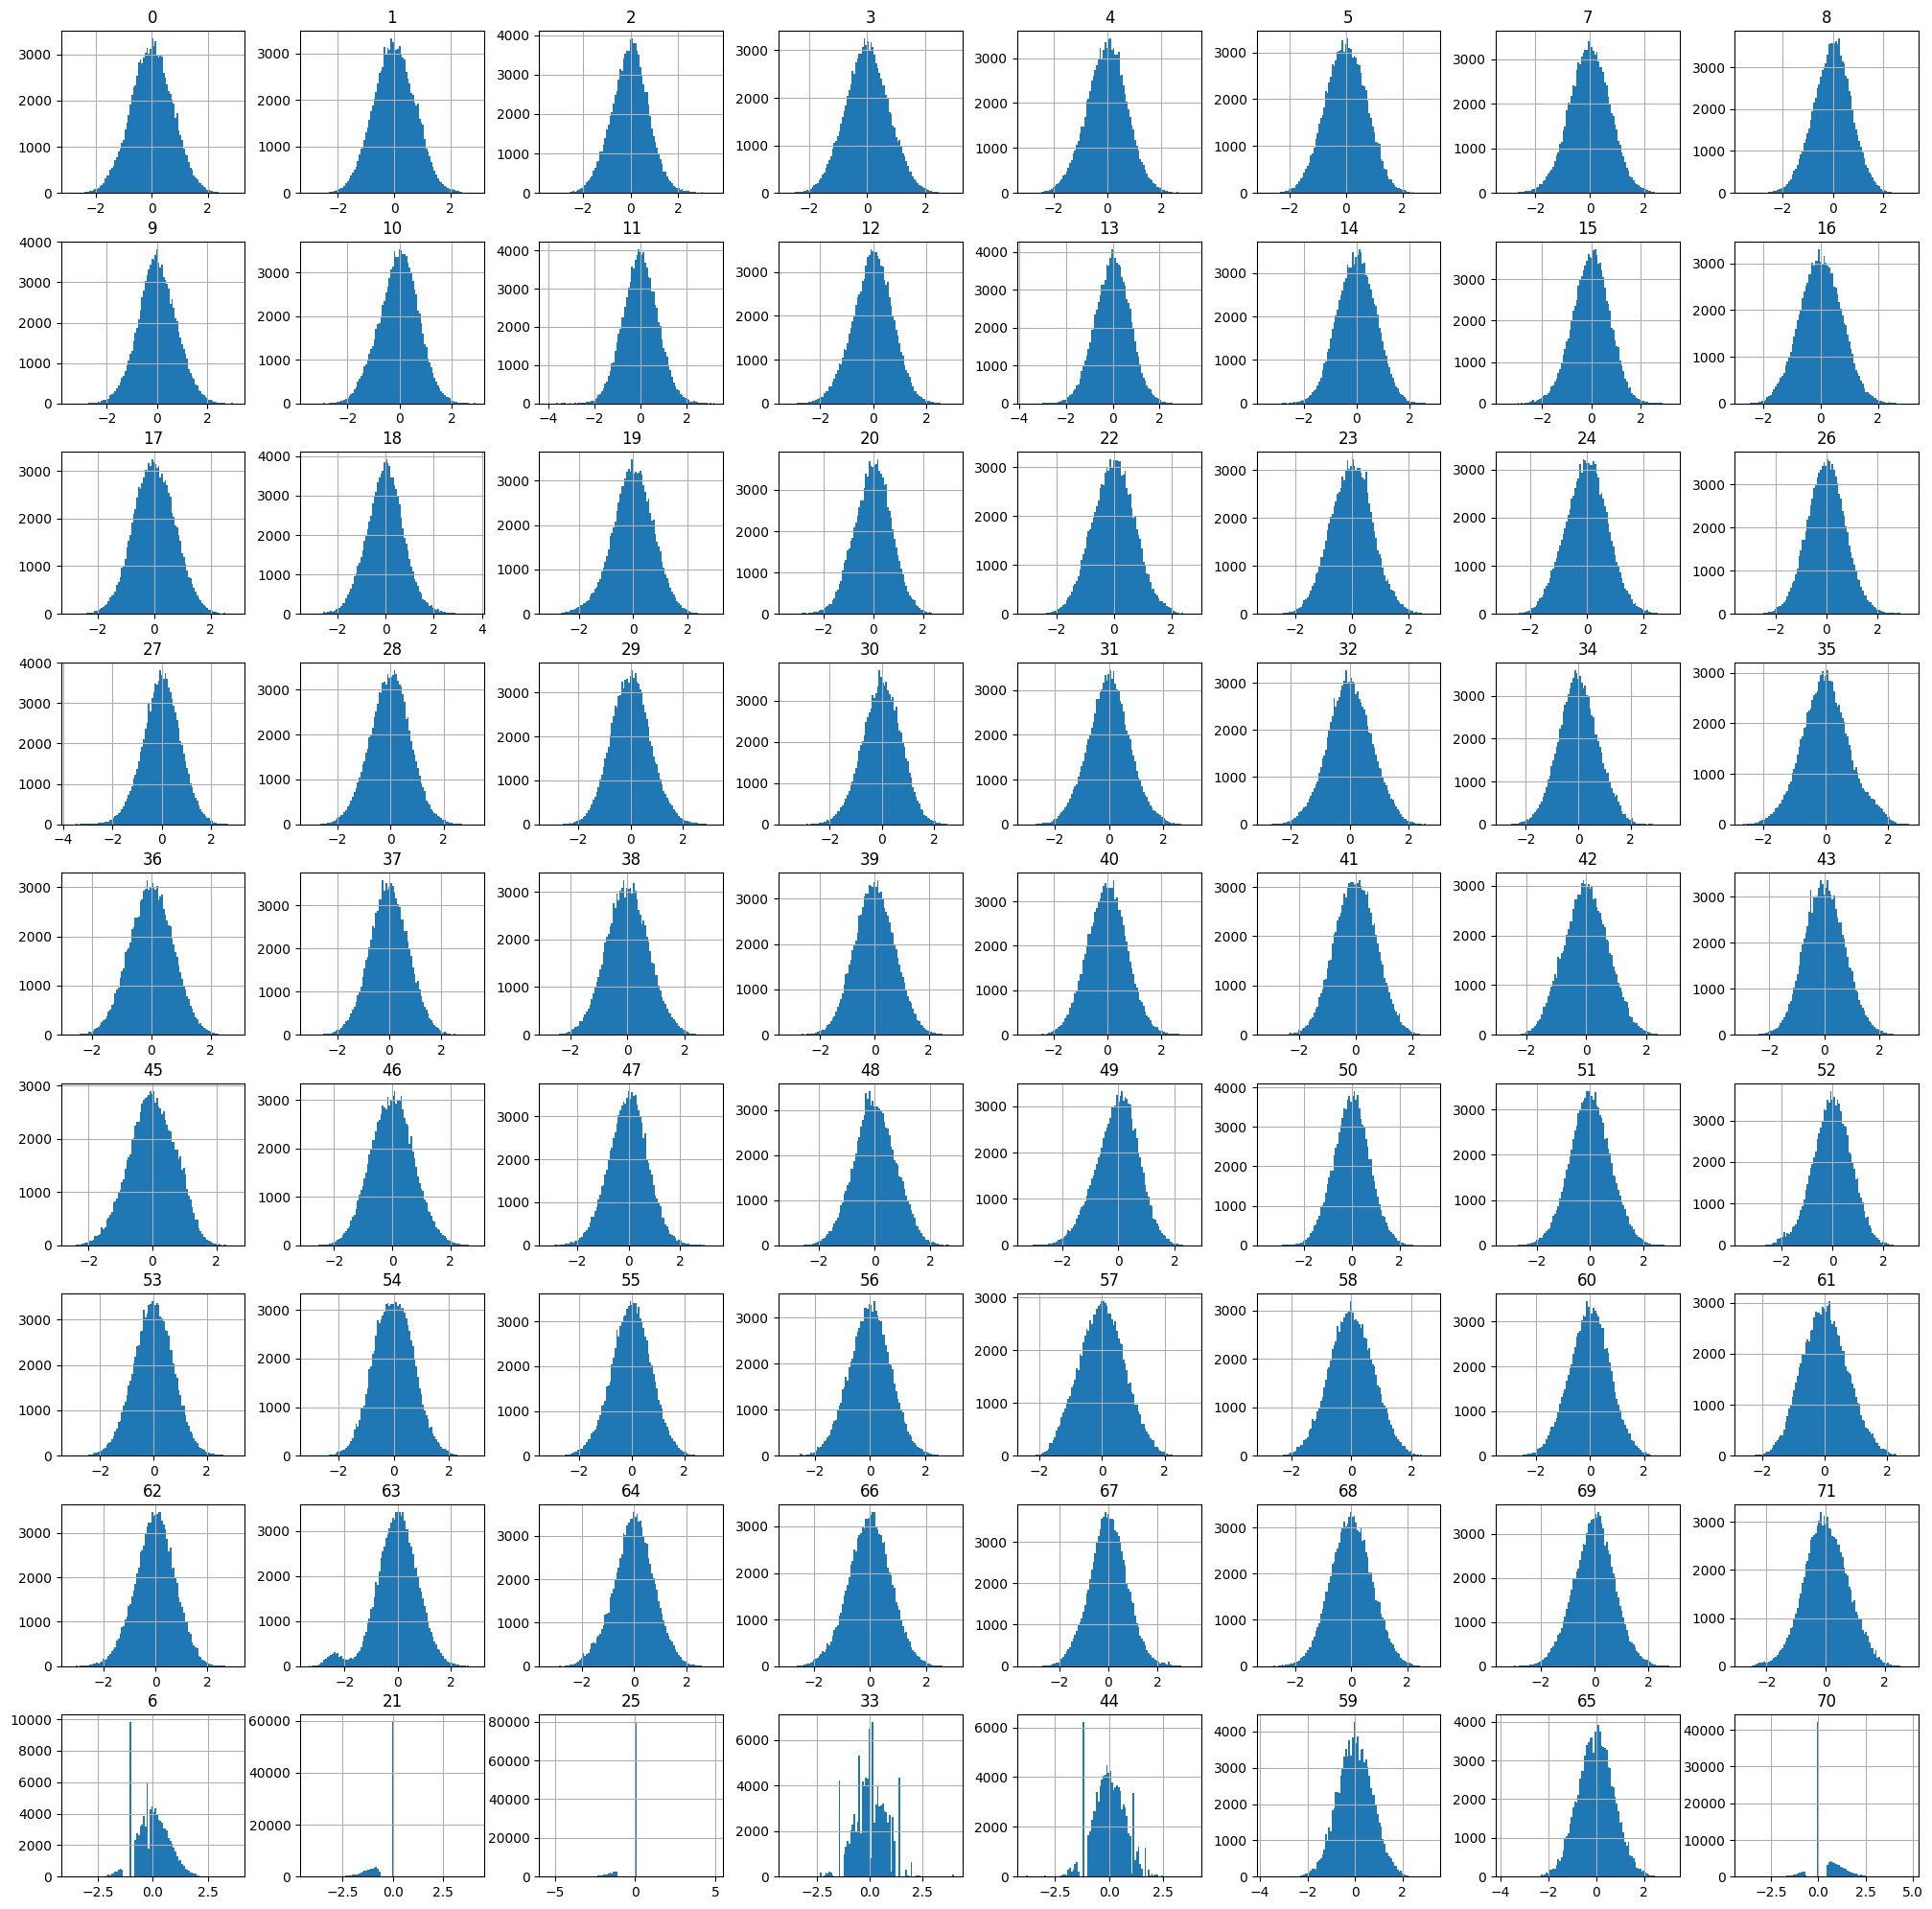

In [9]:
df_analyze.hist(bins=100, figsize=(25, 25))
plt.show()

## Clusterization

In [10]:
def getKMeanScore(n_clusters, features):
    kMeanModel = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
    kMeanModel.fit(features)
    return kMeanModel.inertia_

In [11]:
print("KMeans score for 2 clusters:", getKMeanScore(2, df_analyze[df_analyze.columns]))

KMeans score for 2 clusters: 3917401.75


In [12]:
cluster2results = []

In [13]:
for n_clusters in trange(2, 300, 5):
    score = getKMeanScore(n_clusters, df_analyze[df_analyze.columns])
    cluster2results.append({n_clusters, score})

100%|██████████| 60/60 [05:21<00:00,  5.36s/it]


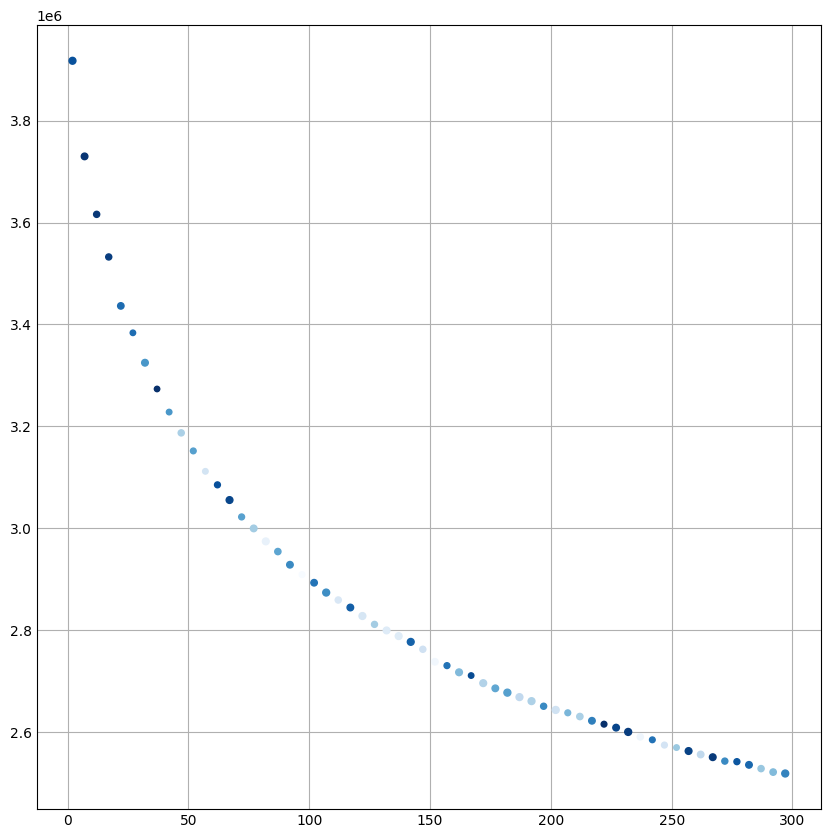

In [14]:
# plot
x = [min(list(i)) for i in cluster2results]
y = [max(list(i)) for i in cluster2results]

plt.style.use('_mpl-gallery')

sizes = np.random.uniform(15, 25, len(x))
colors = np.random.uniform(15, 100, len(x))

fig, ax = plt.subplots()
fig.set_size_inches(8, 8, forward=True)

ax.scatter(x, y, s=sizes, c=colors)

plt.show()

In [15]:
inertias = y

In [16]:
diffs_v2 = np.diff(inertias)

In [17]:
print("len(y):", len(y), "len(inertiass):", len(inertias))

len(y): 60 len(inertiass): 60


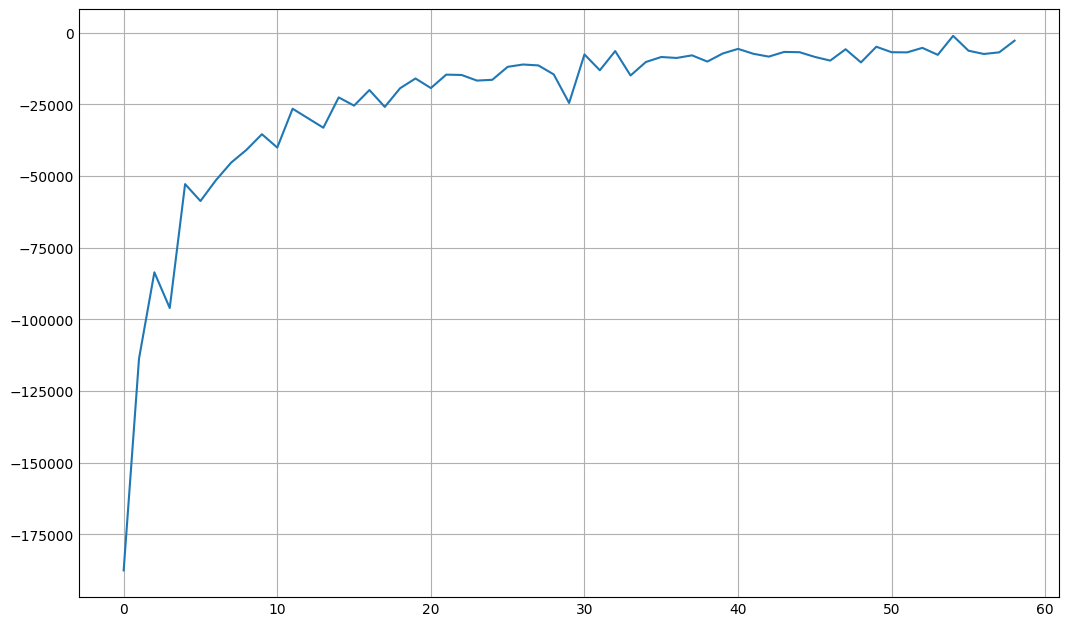

In [34]:
plt.figure(figsize=(10,6))

plt.plot(diffs_v2)
#plt.xticks(np.arange(0, 16), np.arange(2, 16))
plt.show()

In [19]:
diff_r_v2 = diffs_v2[1:]/diffs_v2[:-1]
diff_r_v2

array([0.60603404, 0.73521149, 1.14891257, 0.54987079, 1.11172058,
       0.87704607, 0.87969556, 0.90146992, 0.86689681, 1.1315037 ,
       0.66172249, 1.12498468, 1.11131694, 0.68065832, 1.12696003,
       0.78641665, 1.29420959, 0.74739873, 0.82484715, 1.20955635,
       0.7569413 , 1.00848981, 1.13282642, 0.98356431, 0.72431757,
       0.93167192, 1.02857723, 1.27585753, 1.68562189, 0.30837679,
       1.73292522, 0.48780767, 2.3343772 , 0.68355301, 0.82957584,
       1.03938964, 0.89623876, 1.27640392, 0.71923498, 0.77744735,
       1.30534181, 1.13425106, 0.80296203, 1.01466572, 1.24265329,
       1.15280992, 0.5919129 , 1.79779971, 0.47165248, 1.39292308,
       1.00736323, 0.76979022, 1.46204244, 0.13995779, 5.80603248,
       1.18314418, 0.92322762, 0.40228287])

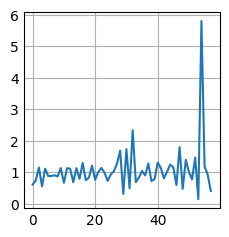

In [20]:
plt.plot(diff_r_v2)
plt.show()

In [21]:
K_CLUSTERS = np.argmin(diff_r_v2[1:])
print("K_CLUSTERS:", x[K_CLUSTERS])
n_clusters = x[K_CLUSTERS]

K_CLUSTERS: 262


## Predict clusters

In [22]:
kMeanModel = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
kMeanModel.fit(df_analyze[df_analyze.columns])

KMeans(n_clusters=262, n_init='auto', random_state=42)

In [23]:
clusters = kMeanModel.predict(df_analyze[df_analyze.columns])

In [24]:
def addCluster(model, data):
    temp_data = data.copy()
    clusters = model.predict(temp_data)
    temp = pd.DataFrame(temp_data.index)
    temp["cluster"] = pd.DataFrame(clusters)
    temp = temp.set_index("Id")
    temp_data["cluster"] = temp
    
    return temp_data

In [25]:
df_analyze = addCluster(kMeanModel,df_analyze[df_analyze.columns])

In [26]:
df_analyze.head(5)

,0,1,2,3,4,5,7,8,9,10,...,71,6,21,25,33,44,59,65,70,cluster
Id,,,,,,,,,,,,,,,,,,,,,
2063841-base,0.481287,0.330736,-0.117689,0.379528,-0.481978,0.079709,-0.186126,0.723119,0.677832,1.082902,...,0.828753,-0.230236,-0.816099,0.0,-0.318342,0.735965,0.906502,0.623958,0.515742,51
1511192-base,0.566840,-0.481727,1.091672,0.313651,0.200880,0.812557,-0.131328,-0.562351,0.024554,-1.147794,...,-1.298222,0.650923,0.000000,0.0,-1.209736,1.365300,0.213929,0.458718,0.000000,154
2586103-base,1.028433,0.356968,0.823628,-0.631010,-1.548380,0.327561,1.072344,0.007077,0.772494,0.250015,...,-0.401413,0.470445,0.000000,0.0,-1.424487,-0.054887,-0.572011,-1.239046,0.000000,72
361174-base,-0.322603,1.440002,-0.960889,1.074155,0.375481,-0.502801,-1.065523,0.301425,0.739502,-0.685064,...,1.354201,-0.060036,-0.888817,0.0,0.000000,-0.022483,-0.343268,0.640768,0.975090,79
1518892-base,-0.012422,0.206491,-0.382443,-0.205258,0.935668,-0.661558,0.394783,0.408666,0.254655,-0.809015,...,-1.297129,-0.106051,0.000000,0.0,0.925363,-0.675198,1.318009,-0.114560,0.000000,27


## Prepare LogRegression MultiClass

In [27]:
temp_df_analyze = df_analyze.copy()
temp_target = temp_df_analyze.pop("cluster")

logResModel = LogisticRegression(random_state=42, max_iter=1000)
logResModel.fit(temp_df_analyze, temp_target)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
result = permutation_importance(logResModel, temp_df_analyze, temp_target, n_repeats=20, n_jobs=-1, random_state=42)

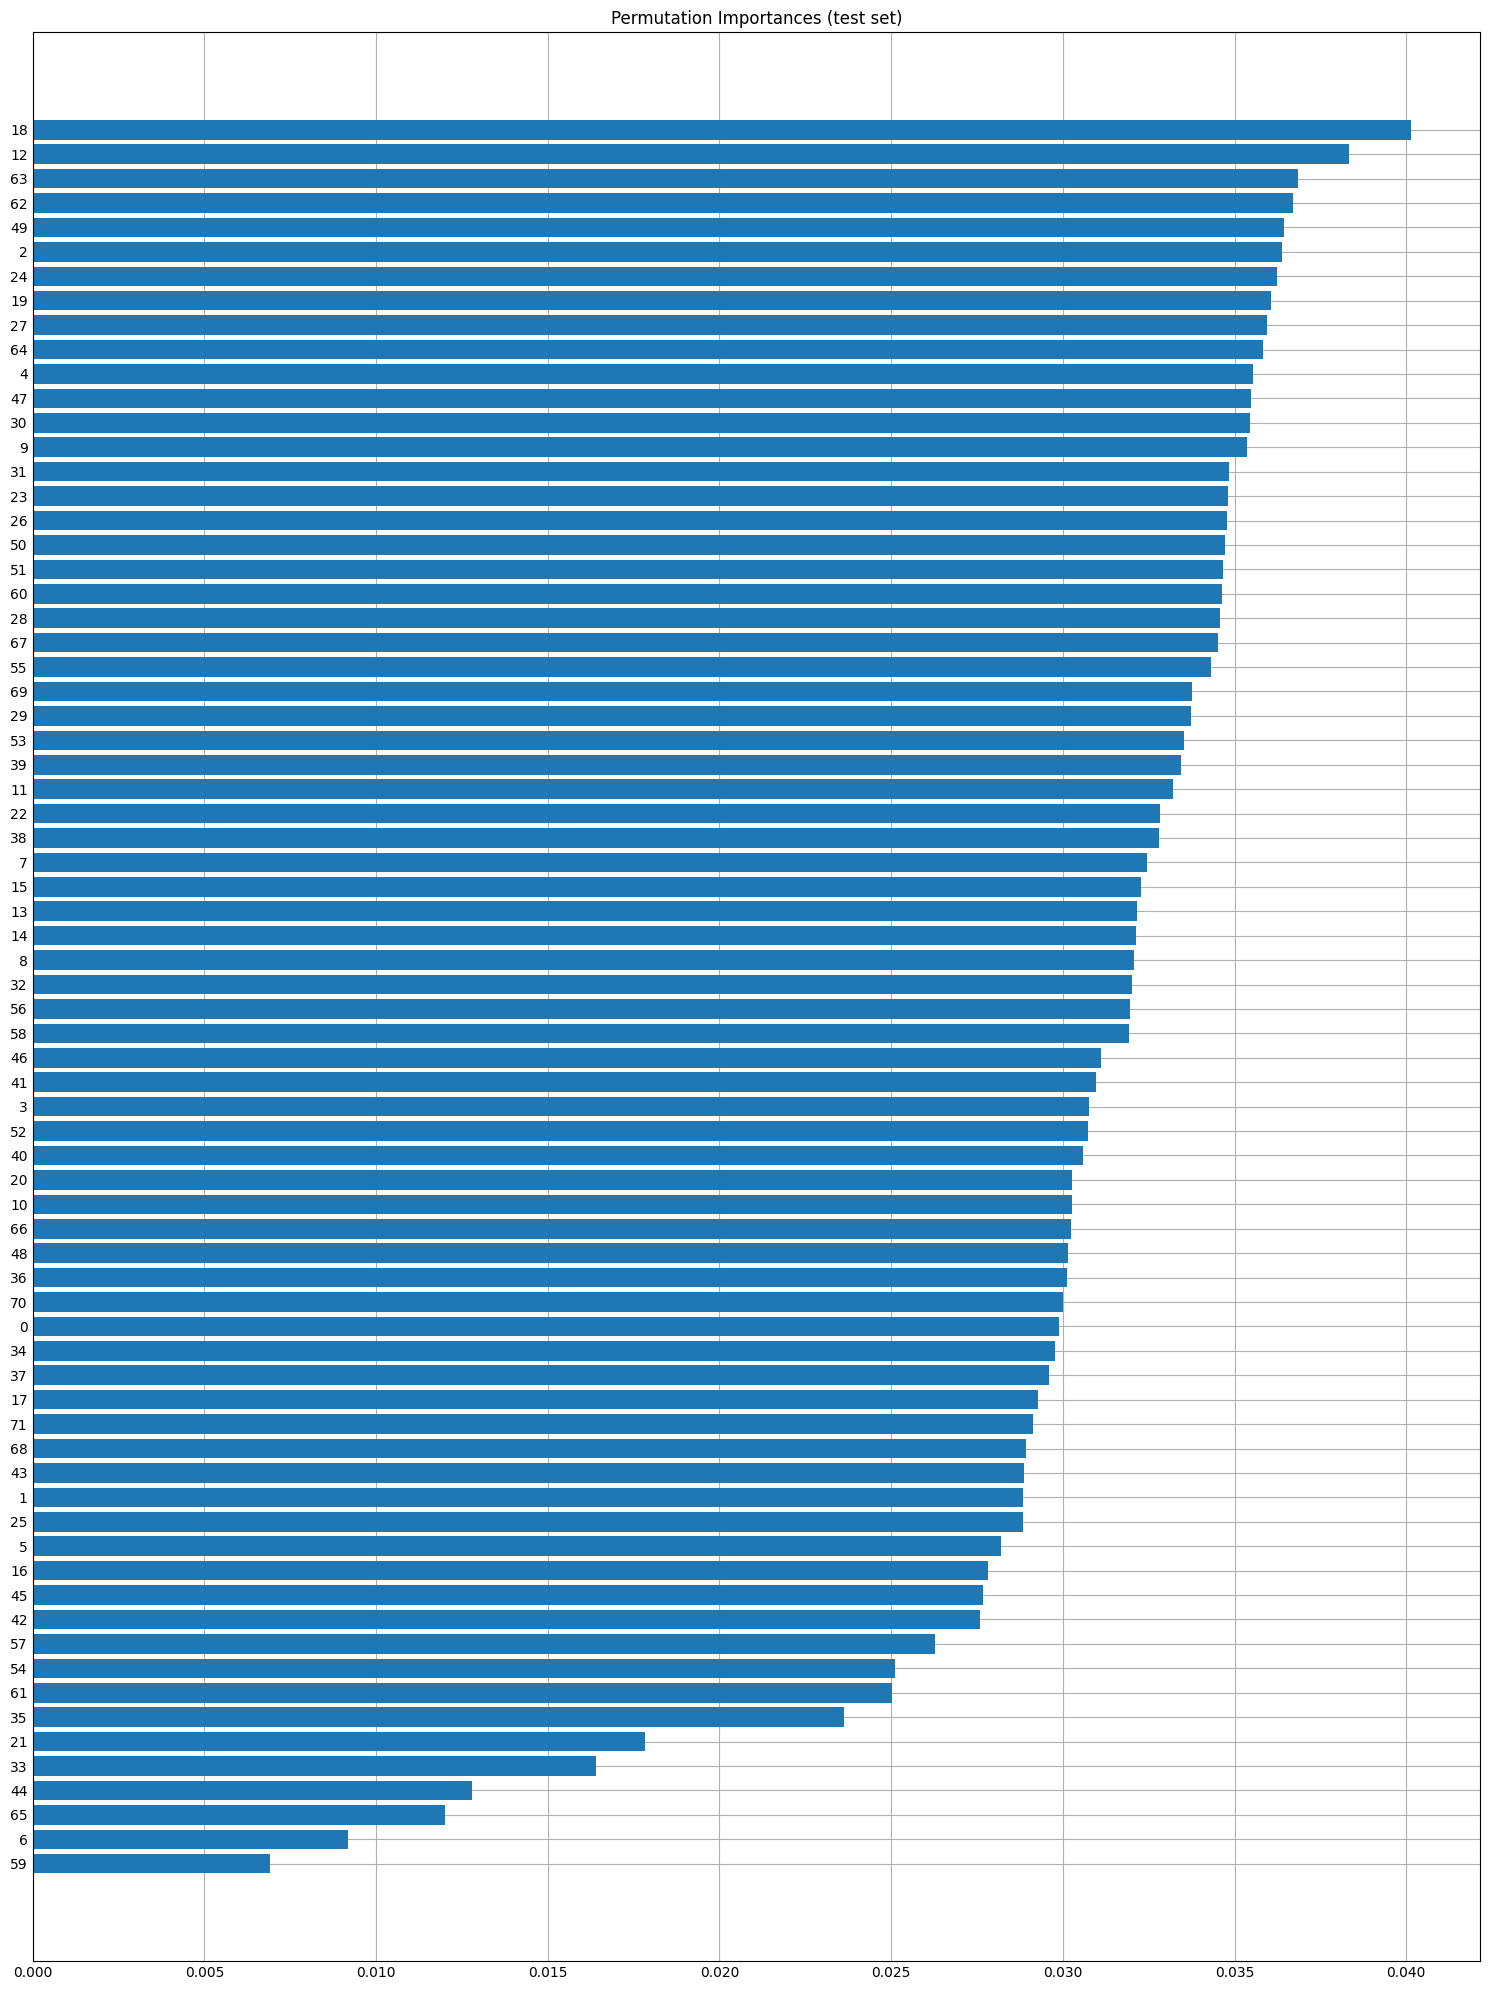

In [29]:
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(temp_df_analyze.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.set_size_inches(15, 20, forward=True)
fig.tight_layout()
plt.show()

In [35]:
feature_importance = pd.DataFrame(temp_df_analyze.columns[sorted_idx], columns=["feature"])
feature_importance["value"] = pd.DataFrame(result.importances[sorted_idx].mean(axis=1))

In [37]:
len(feature_importance[feature_importance["value"] >= 0.0])

72

In [38]:
feature_importance[feature_importance["value"] >= 0.034].sort_values(by="value", ascending=False).head()

,feature,value
71,18,0.040141
70,12,0.038320
69,63,0.036837
68,62,0.036713
67,49,0.036431


In [39]:
feature_importance[feature_importance["value"] >= 0.0].sort_values(by="value", ascending=False).head(100)["feature"].values

array(['18', '12', '63', '62', '49', '2', '24', '19', '27', '64', '4',
       '47', '30', '9', '31', '23', '26', '50', '51', '60', '28', '67',
       '55', '69', '29', '53', '39', '11', '22', '38', '7', '15', '13',
       '14', '8', '32', '56', '58', '46', '41', '3', '52', '40', '20',
       '10', '66', '48', '36', '70', '0', '34', '37', '17', '71', '68',
       '43', '1', '25', '5', '16', '45', '42', '57', '54', '61', '35',
       '21', '33', '44', '65', '6', '59'], dtype=object)